## Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. \
Города дополнительно поделены на
северные и южные.

In [55]:
data = pd.read_csv('water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


### 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

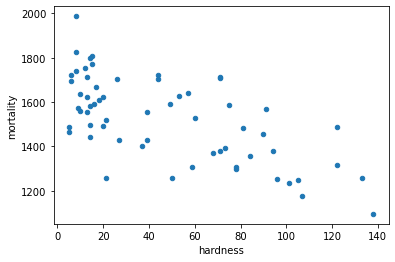

In [56]:
data.plot(kind='scatter', x='hardness', y='mortality')

* Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [57]:
# коэффициент Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [60]:
# коэффициент Спирмена
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


* Построить модель линейной регрессии

In [61]:
X = data[['hardness']]
y = data['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэф a ->', model.coef_[0])
print('Коэф b ->', model.intercept_)

Коэф a -> -3.1316708721378266
Коэф b -> 1668.9722977277095


In [62]:
# Предсказанные значения
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

* Рассчитать коэффициент детерминации

In [63]:
model.score(X_test, y_test)

0.5046490611017092

#### Вывод:
Коэффициент получился средним, скорее всего нужно больше данных, на датасете из 61 результата какие-то модели строить мне кажется неправильно

* Вывести график остатков

<AxesSubplot:xlabel='hardness', ylabel='remains'>

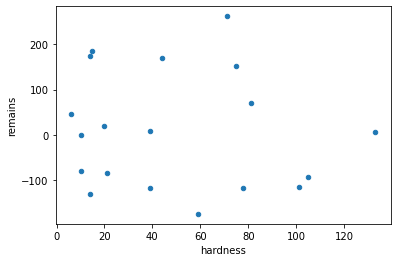

In [64]:
result_df = X_test.copy()

result_df['Y_test'] = y_test
result_df['Y_pred'] = y_pred
result_df['remains'] = result_df['Y_test']-result_df['Y_pred'] 

result_df.plot(kind='scatter', x='hardness', y='remains')

#### Выводы:
В принципе остатки распределены весьма хаотично. Говорит о том, что модель подробна более менее правильно. Хотя небольшая концетрация вначале есть. По наличию зависимости получилось вот так: коэф a отрицательный - чем выше жесткость воды, тем ниже смертность. Мне кажется это очень странным и я бы не делал выводы, что смертность напрямую зависит от жесткости воды.

### 3. Задание
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [65]:
data_South = data.loc[data['location'] == 'South']
data_North = data.loc[data['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

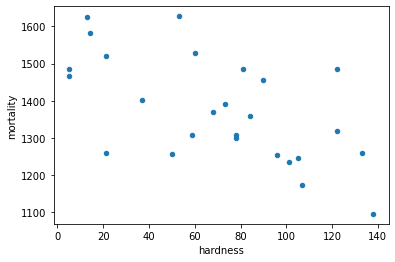

In [66]:
# Считаем для юга
# Построить точечный график
data_South.plot(kind='scatter', x='hardness', y='mortality')

In [67]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
print('Пирсон')
display(data_South[['hardness', 'mortality']].corr())
print('Спирмен')
display(data_South[['hardness', 'mortality']].corr(method='spearman'))

Пирсон


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


Спирмен


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [68]:
# Построить модель линейной регрессии
X = data_South[['hardness']]
y = data_South['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэф a ->', model.coef_[0])
print('Коэф b ->', model.intercept_)

Коэф a -> -3.513429212378229
Коэф b -> 1640.2204603423374


In [69]:
# Предсказанные значения для юга
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [70]:
# Рассчитать коэффициент детерминации
model.score(X_test, y_test)

-2.551922301235205

#### Выводы:
Получился отрицательным - слишком мало данных для прогнозирования. Но возможно также, что и зависимости нет, либо она нелинейная

<AxesSubplot:xlabel='hardness', ylabel='remains'>

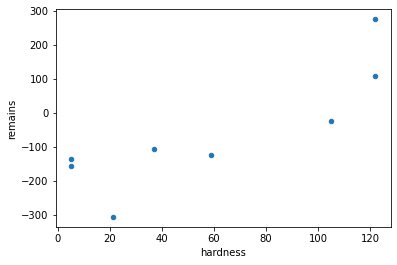

In [71]:
# Вывести график остатков
result_df = X_test.copy()

result_df['Y_test'] = y_test
result_df['Y_pred'] = y_pred
result_df['remains'] = result_df['Y_test']-result_df['Y_pred']

result_df.plot(kind='scatter', x='hardness', y='remains')

#### Выводы:
График остатков также показывает наличие закономерности - значит модель не подходит, и если зависимость есть, то она нелинейная

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

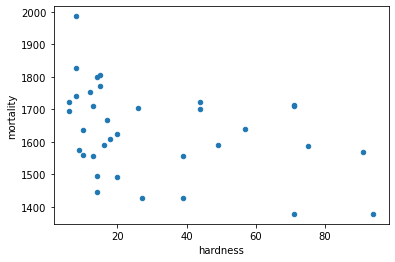

In [72]:
# Считаем для севера
# Построить точечный график
data_North.plot(kind='scatter', x='hardness', y='mortality')

In [73]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
print('Пирсон')
display(data_North[['hardness', 'mortality']].corr())
print('Спирмен')
display(data_North[['hardness', 'mortality']].corr(method='spearman'))

Пирсон


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


Спирмен


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [74]:
# Построить модель линейной регрессии
X = data_North[['hardness']]
y = data_North['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэф a ->', model.coef_[0])
print('Коэф b ->', model.intercept_)

Коэф a -> -1.9768622600638235
Коэф b -> 1688.150229031281


In [75]:
# Предсказанные значения для севера
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [76]:
# Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.018885304285745863

#### Выводы
Коэффициент детерминации очень низкий, почти 0. Опять же похоже линейная модель не очень походит для данного прогнозирования. Либо крайне мало данных для прогнозирования

<AxesSubplot:xlabel='hardness', ylabel='remains'>

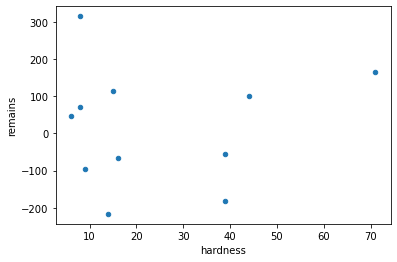

In [77]:
# Вывести график остатков
result_df = X_test.copy()

result_df['Y_test'] = y_test
result_df['Y_pred'] = y_pred
result_df['remains'] = result_df['Y_test']-result_df['Y_pred']

result_df.plot(kind='scatter', x='hardness', y='remains')

#### Выводы
Остатки впринципе имеют хаотичное распределение. Особой закономерности я не вижу

### Общие выводы по третьему заданию:

Аналогичная зависимость для северных и южных городов по отдельности не сохраняется. Я думаю крайне мало данных, чтобы посчитать зависимость. \
Для юга коэф детерминации получились отрицательными - линейная закономерность исчезла, либо стало мало данных для прогнозирования. \
Для севера коэф детерминации почти ноль - линейной закономерности также возоможно нет, либо стало мало данных для прогнозирования